In [2]:
import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sys.path.append(os.pardir) # 부모 디렉토리의 파일을 가져올 수 있도록 설정

from dataset.mnist import load_mnist
from PIL import Image

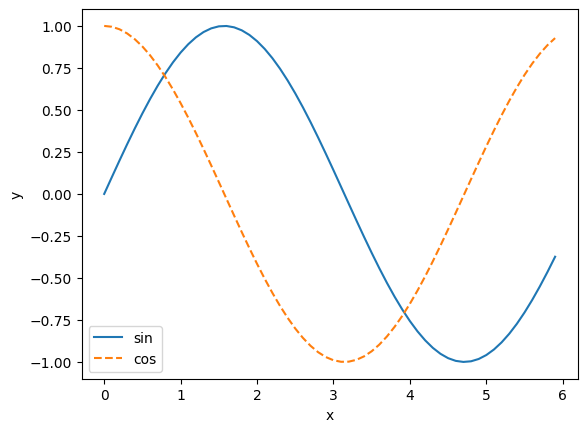

In [3]:
x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label="sin")
plt.plot(x, y2, linestyle="--", label="cos")
plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()


In [4]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1


In [5]:
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7

In [6]:
w * x
np.sum(w * x) + b

np.float64(-0.19999999999999996)

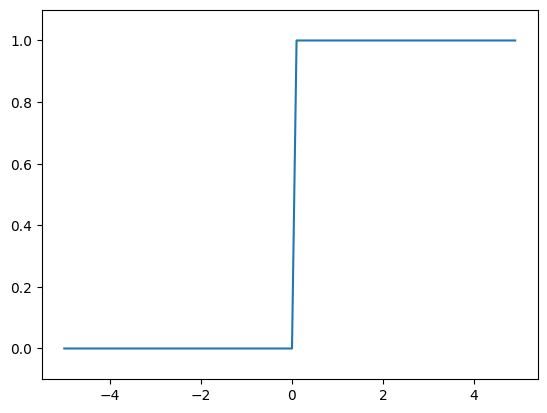

In [7]:
def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [9]:
# 브로드캐스트: 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행
t = np.array([1.0, 2.0, 3.0])
1.0 + t
1.0 / t

array([1.        , 0.5       , 0.33333333])

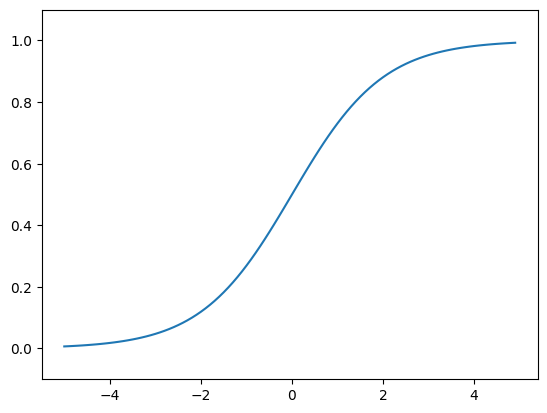

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [11]:
A = np.array([[1, 2], [3, 4]])
A.shape

B = np.array([[5, 6], [7, 8]])
B.shape

np.dot(A, B)

np.dot(A, A)

array([[ 7, 10],
       [15, 22]])

In [12]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [13]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [14]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z2)

(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]


In [15]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


In [16]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])# x1, x2
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [17]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [18]:
# 소프트맥스 함수수
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [19]:
# a = np.array([1010, 1000, 990])
# softmax(a)

# c = np.max(a) # c는 출력 신호 중 최댓값
# print(a - c) # 각 출력 신호에서 최댓값을 빼주기

# softmax(a -c)

In [20]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

# flatten: True -> 입력 이미지를 1차원 배열로 설정
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [21]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)

    return x_test, t_test

def init_network():
    # sample_weight: 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있음
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] # 편향
    b1, b2, b3 = network['b1'], network['b2'], network['b3'] # 가중치

    # 0층(입력층층)
    a1 = np.dot(x, W1) + b1
    # print(a1.shape)
    z1 = sigmoid(a1)

    # 1층
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    # 2층(출력층)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y # 출력층 10 뉴런런

x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 가장 확률이 높은 원소의 인덱스
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [22]:
x[0].shape # [1, 2, ... 784]
x.shape # [[1, 2, ... 784], [1, 2, ... 784], [1, 2, ... 784], ... 10000개]

(10000, 784)

In [23]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [24]:
# 배치 처리

x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

# len(x) = 10000
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [25]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
# 1(0.8), 2(0.6), 1(0.5), 0(0.8)
# 각 배열의 최댓값의 인덱스
print(y)

[1 2 1 0]


In [26]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)

[ True  True False  True]


np.int64(3)

In [33]:
# y = 신경망의 출력(신경망이 추정한 값)
# t = 정답 레이블
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답은 2

### 손실함수

In [28]:
# 오차제곱합 SSE
# 손실 함수의 출력값이 작아야함 -> 오차가 작다 -> 정답에 가깝다
def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t)**2)

sum_squares_error(np.array(y), np.array(t))

np.float64(0.09750000000000003)

In [34]:
# 교차 엔트로피 오차
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

cross_entropy_error(np.array(y), np.array(t))

np.float64(0.510825457099338)

In [35]:
# y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
# cross_entropy_error(np.array(y), np.array(t))

np.float64(2.302584092994546)

### 미니배치 학습

In [38]:
# x = 사진 데이터 (28x28=784크기의 사진이 60000장장)
# t = 정답 레이블블 (0, 1, 2 ... 9)
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [39]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [42]:
# 이 훈련 데이터에서 무작위로 10장만 빼내기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [56]:
# (배치용) 교차 엔트로피 오차 구현현
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size
    # return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 수치 미분

In [59]:
# 나쁜 구현
# def numerical_diff(f, x):
#     h = 1e-50
#     return (f(x+h)-f(x)) / h

In [66]:
# 좋은 구현
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [64]:
# y = 0.01x^2 + 0.1x
def function_1(x):
    return 0.01*x**2 + 0.1*x

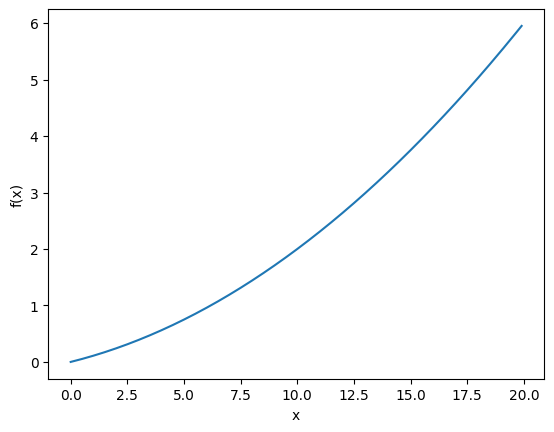

In [65]:
x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다(20은 미포함)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [70]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))


0.1999999999990898
0.2999999999986347


### 편미분

In [71]:
def function_2(x):
    return x[0]**2 + x[1]**2    
    # 또는 return np.sum(x**2)

In [75]:
# 문제1: x0=3, x1=4일 때, x0에 대한 편미분
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [76]:
# 문제1: x0=3, x1=4일 때, x1에 대한 편미분
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp1, 4.0)

7.999999999999119

In [79]:
# (x0, x1) 편미분을 따로 하지 않고 동시에 미분하기
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같고 그 원소가 모두 0인 배열 생성성

    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

In [81]:
numerical_gradient(function_2, np.array([3.0, 4.0]))
numerical_gradient(function_2, np.array([0.0, 2.0]))
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([0., 0.])

### 경사 하강법

In [82]:
# f: 최적화하려는 함수, init_x: 초깃값, lr: 학습률, step_num: 경사법에 따른 반복 횟수
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

### 경사법으로 $$f(x_0, x_1) = x_0^2 + x_1^2$$의 최솟값 구하기

In [83]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])